imports

In [29]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



loading the dataset

In [30]:
file_path = 'heart.csv'
data = pd.read_csv(file_path)

understanding  the dataset

In [31]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    float64
 12  id              924 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 94.0+ KB


In [32]:
data_shape=data.shape
data_shape

(924, 13)

In [33]:
data_head = data.head() 
data_head


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,id
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0.0,1
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1.0,2
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0.0,3
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1.0,4
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0.0,5


In [34]:
data_describe = data.describe()
data_describe

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,id
count,924.000000,918.000000,924.000000,924.000000,924.000000,924.000000,923.000000,924.000000
mean,53.444805,132.382353,199.370130,0.231602,136.834416,0.884848,0.550379,456.715368
std,9.459739,18.509592,109.625262,0.422084,25.385941,1.065080,0.497725,266.527784
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,1.000000
25%,47.000000,120.000000,174.750000,0.000000,120.000000,0.000000,0.000000,225.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.550000,1.000000,456.500000
75%,60.000000,140.000000,267.000000,0.000000,155.250000,1.500000,1.000000,687.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,918.000000


Filtering dataset

In [35]:
# removing the id since it is not useful for our model 
data=data.drop(['id'],axis=1)
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 86.8+ KB


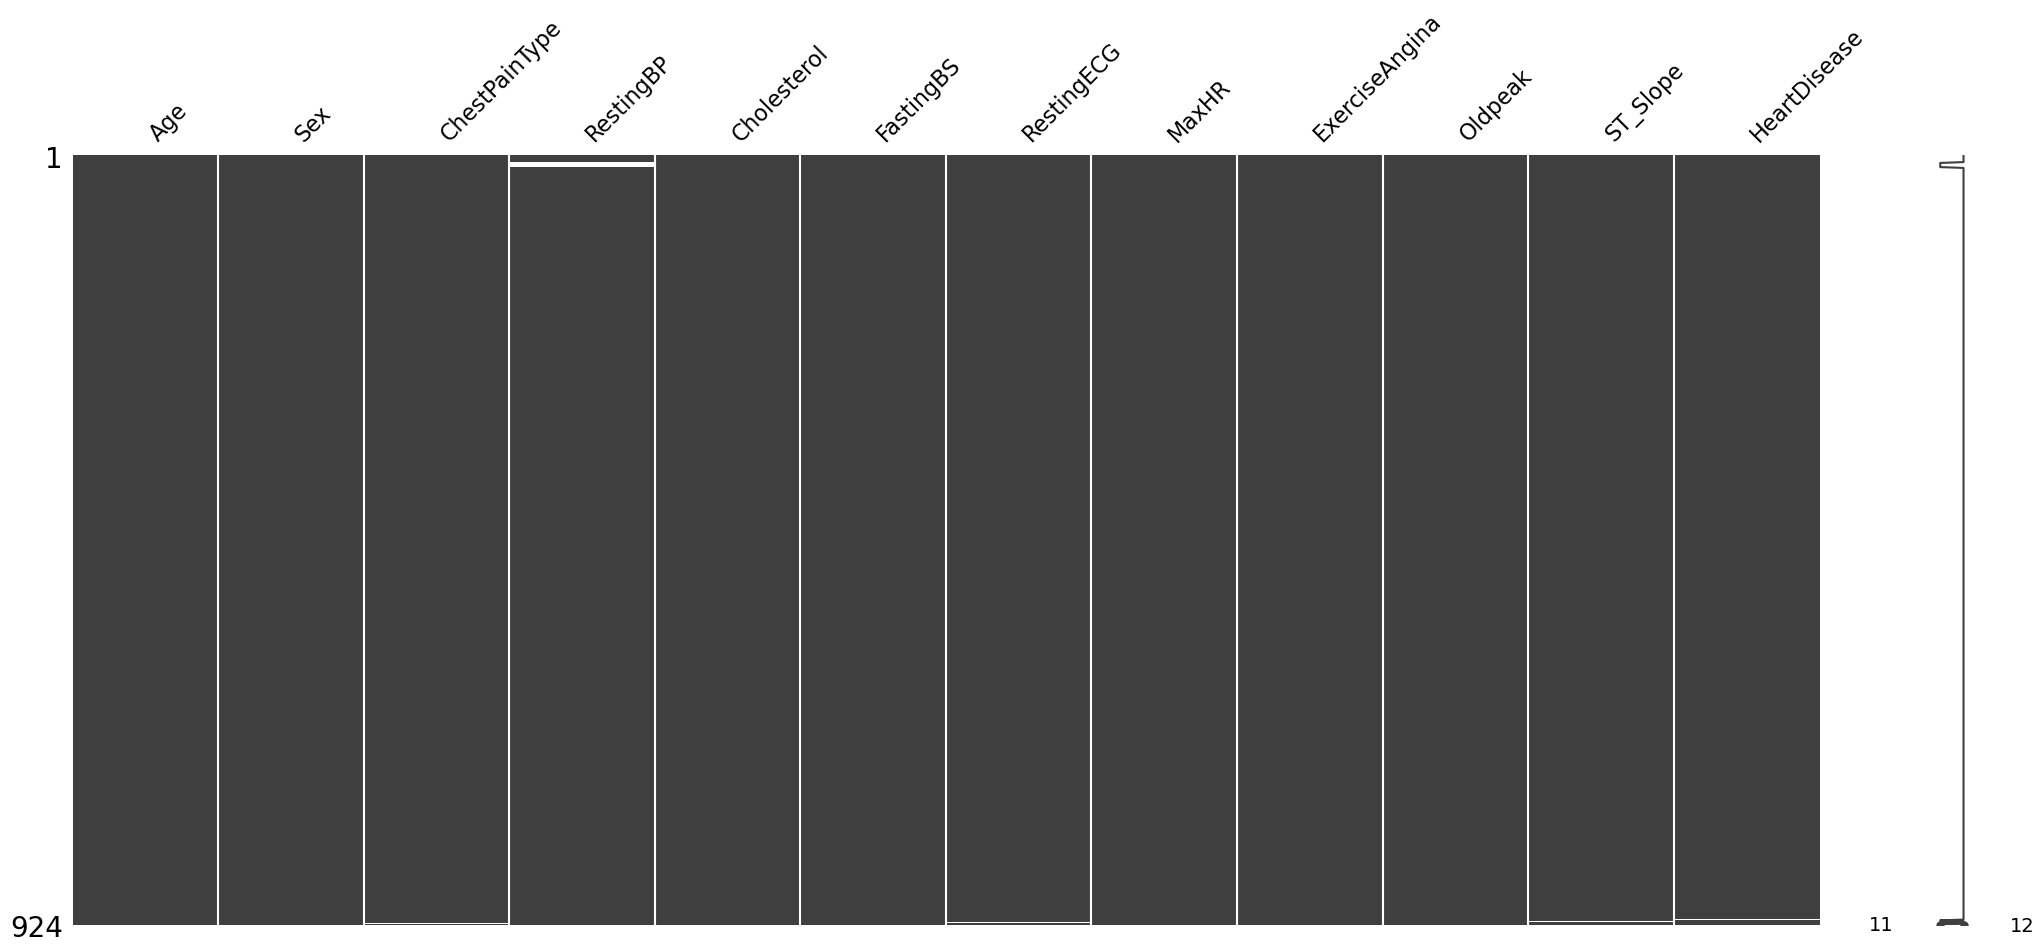

In [36]:
data.isnull()
data.isnull().sum()
msno.matrix(data)
plt.show()


handling missin values

In [37]:
# taking the average which have more than 5 missing values
data['RestingBP']= data['RestingBP'].fillna(data['RestingBP'].mean())
data.isnull().sum()

Age               0
Sex               0
ChestPainType     1
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        1
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          1
HeartDisease      1
dtype: int64

In [38]:
# drop rows with less then 5 missing values 
data=data.dropna()
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

handling duplicates

In [47]:
data.duplicated().sum()


6

In [51]:
data=data.drop_duplicates()
data.duplicated().sum()


0

Handle Outliers and Fix Data Inconsistencies


In [ ]:
 data = data[data['cholesterol'] < data['cholesterol'].quantile(0.95)]
data['sex'] = data['sex'].str.lower()  # Convert to lowercase.
data['sex'] = data['sex'].replace({'m': 1, 'f': 0})
data_info = data.info()
data_info

Analyze relationship Between Variables

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Cholesterol')
plt.show()
sns.pairplot(data)
plt.show()


Visualize Data Distribution

In [ ]:
data['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(data['cholesterol'])
plt.show()


Check Target Variable Distribution

In [ ]:
sns.countplot(data['target'])
plt.show()

 Feature Insights

In [ ]:
sns.boxplot(x='target', y='cholesterol', data=data)
plt.show()
# print(data.groupby('target').mean())


Separate Features and Target

In [ ]:
X = data.drop('target', axis=1) 
y = data['target']               

Separating Training and Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model training

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

saving the model

In [ ]:
joblib.dump(model, 'heart_disease_model.pkl')

Make Predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluate the Model

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))